#Python + Astronomy
This course will be an introduction to Astropy, a maturing library for astronomy routines and tools in Python.

[Astropy](http://astropy.org) started as a combination of various common Python libraries (Pyfits, PyWCS, asciitables, and others) and is working towards providing a consistent API with capabilities for all astronomers. It is developed with extensive [automated testing](https://en.wikipedia.org/wiki/Software_testing), long-term stable releases, [extensive documentation](https://astropy.readthedocs.org/), and a friendly community for [contributions](http://www.astropy.org/contribute.html).

Note that this design differs from the [IDL Astronomy User's Library](http://idlastro.gsfc.nasa.gov/), which is essentially a mishmash of routines.

These tutorials make some use of the examples at:
- [The official Astropy Tutorials](http://www.astropy.org/astropy-tutorials/)
- [A Workshop Given at SciPy 2014](https://astropy4scipy2014.readthedocs.org/en/latest/)

In [1]:
# First, make sure this works:
import astropy
# If this doesn't work, raise your hand!

## Using FITS files in Python

FITS files are the commonly used data format in astronomy: they are essentially collections of "header data units," which can be images, tables, or some other type of data.

In [2]:
# First we load the fits submodule from astropy:
from astropy.io import fits

# Then we load a fits file (here an image from the Schmidt telescope)
hdu_list = fits.open('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits')
print(hdu_list)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f84472a75c0>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f84472b26d8>]


The FITS file contains two header data units, a Primary HDU and an ASCII table HDU (see [NASA's Primer](http://fits.gsfc.nasa.gov/fits_primer.html)) for the different types and limitations.

We can use the `hdu_list` object like a list to obtain information about each HDU:

In [3]:
print(hdu_list[0].data)
print(type(hdu_list[0].data))
print(hdu_list[0].header['FILTER'])
print(hdu_list[0].shape)

[[ 7201  6642  6642 ...,  9498  9498 10057]
 [ 6642  6363  6642 ..., 10057 10616 10616]
 [ 6922  6642  6922 ..., 10337 11175 10616]
 ..., 
 [ 5412  5132  5412 ..., 13000 12580 12021]
 [ 5796  5517  5796 ..., 12546 12546 11987]
 [ 5796  5796  6076 ..., 11987 12546 12546]]
<class 'numpy.ndarray'>
OG590
(893, 891)


In [4]:
# We can also display the full header to get a better idea of what we are looking at
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Since this is an image, we could take a look at it with the `matplotlib` package:

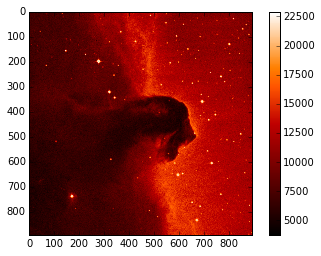

In [5]:
# If using ipython notebook:
%matplotlib inline

# Load matplotlib
import matplotlib.pyplot as plt
# Load colormaps (the default is somewhat ugly)
from matplotlib import cm

# If *not* using ipython notebook:
# plt.ion()

plt.imshow(hdu_list[0].data, cmap=cm.gist_heat)
plt.colorbar()

We can manipulate the HDU's in any way that we want with the astropy.io.fits submodule:

In [6]:
hdu_list[0].data /= 2
hdu_list[0].header['FAKE'] = 'New Header'
hdu_list[0].header['FILTER'] = 'Changed'
print(hdu_list[0].data)
hdu_list[0].header

[[3600 3321 3321 ..., 4749 4749 5028]
 [3321 3181 3321 ..., 5028 5308 5308]
 [3461 3321 3461 ..., 5168 5587 5308]
 ..., 
 [2706 2566 2706 ..., 6500 6290 6010]
 [2898 2758 2898 ..., 6273 6273 5993]
 [2898 2898 3038 ..., 5993 6273 6273]]


SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Let's write our new FITS file to our local computer. Running `pwd` will tell us what directory it is saved to.

In [7]:
%pwd

'/home/joe/toledo/workshop/astro-python'

In [8]:
hdu_list.writeto('new-horsehead.fits', clobber=True)

##Astropy ASCII file reader
While a number of ASCII file readers exist (including [numpy.genfromtxt](http://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html), [numpy.loadtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), and [pandas.read\_\*](http://pandas.pydata.org/pandas-docs/stable/io.html)), Astropy includes readers text file formats commonly used in Astronomy.

These are read as an [Astropy Table](https://astropy.readthedocs.org/en/stable/table/index.html) object, which are convertable to numpy arrays or pandas DataFrames. These can contain unit information and there is work on-going to incoporate uncertainities.

In [9]:
# First we load the ascii submodule:
from astropy.io import ascii

example_csv = ascii.read('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')
print(example_csv)

             street                   city       zip  ...  latitude  longitude 
------------------------------- --------------- ----- ... --------- -----------
                   3526 HIGH ST      SACRAMENTO 95838 ... 38.631913 -121.434879
                    51 OMAHA CT      SACRAMENTO 95823 ... 38.478902 -121.431028
                 2796 BRANCH ST      SACRAMENTO 95815 ... 38.618305 -121.443839
               2805 JANETTE WAY      SACRAMENTO 95815 ... 38.616835 -121.439146
                6001 MCMAHON DR      SACRAMENTO 95824 ...  38.51947 -121.435768
             5828 PEPPERMILL CT      SACRAMENTO 95841 ... 38.662595 -121.327813
            6048 OGDEN NASH WAY      SACRAMENTO 95842 ... 38.681659 -121.351705
                  2561 19TH AVE      SACRAMENTO 95820 ... 38.535092 -121.481367
11150 TRINITY RIVER DR Unit 114  RANCHO CORDOVA 95670 ... 38.621188 -121.270555
                   7325 10TH ST       RIO LINDA 95673 ... 38.700909 -121.442979
                            ...         

In [10]:
# We can also read Astronomy-specific formats.
# For example, IPAC formatted files
example_ipac = ascii.read('http://exoplanetarchive.ipac.caltech.edu/docs/tblexamples/IPAC_ASCII_one_header.tbl')
print(example_ipac)

 object       ra          dec     
------- ------------- ------------
    M56   289.1479411   30.1845005
 ic4710  277.15820833  66.98227778
   hoix   49.38333333  69.04583333
  tol89  210.33983333 -33.06377778
    ngc 4552188.91586  12.55634139
    M82   148.9696875  69.67938333
  mrk33  158.13283333  54.40102778
ngc1097     41.579375 -30.27488889
    arp 22179.8745833 -19.29722222
   M 65  169.73316667  13.09222222


Tables support many of the same indexing and slicing operations as numpy arrays, as well as some of the higher-level operations of pandas. See the Astropy [tutorial](https://astropy4scipy2014.readthedocs.org/en/latest/_static/notebooks/03_Tables.html) for more examples.

##Units and Quantities

A nice addition to Astropy is the ability to manipulate units used in astronomy. By convention, we import this functionality into the name `u`:

In [11]:
from astropy import units as u

In [12]:
# SI, cgs, and other units are defined in Astropy:
u.m, u.angstrom, u.erg, u.Jy, u.solMass

(Unit("m"), Unit("Angstrom"), Unit("erg"), Unit("Jy"), Unit("solMass"))

In [13]:
# Units all have documentation and attributes
print(u.solMass.names)
print(u.solMass.physical_type)

['solMass', 'M_sun', 'Msun']
mass


We can create composite units, such as units of acceleration:

In [14]:
u.m / u.second / u.second

Unit("m / s2")

In [15]:
u.pc / u.attosecond / u.fortnight

Unit("pc / (attosecond fortnight)")

In addition to unit manipulation, Astropy has a concept of Quantities - numbers (or arrays) with units:

In [16]:
print(5*u.erg/u.second)
5*u.erg/u.second

5.0 erg / s


<Quantity 5.0 erg / s>

In [17]:
import numpy as np
my_data = np.array([1,2,3,4,5,6]) * u.Hertz
print(my_data)

[ 1.  2.  3.  4.  5.  6.] Hz


In [18]:
# Quantities (and their units) can be combined through algebraic manipulation:
new_data = (6.626e-34 * u.m**2 * u.kg / u.second) * my_data
print(new_data)

[  6.62600000e-34   1.32520000e-33   1.98780000e-33   2.65040000e-33
   3.31300000e-33   3.97560000e-33] Hz kg m2 / s


Since the computer knows the physical types of each unit, it is able to make conversions between them. Let's use this to simplify `my_data`. The `decompose` method will try to use the most basic units, while the `.si` and `.cgs` will attempt simple representations with those two bases:

In [19]:
print(new_data.cgs)
print(new_data.si)
print(new_data.decompose())

[  6.62600000e-27   1.32520000e-26   1.98780000e-26   2.65040000e-26
   3.31300000e-26   3.97560000e-26] erg
[  6.62600000e-34   1.32520000e-33   1.98780000e-33   2.65040000e-33
   3.31300000e-33   3.97560000e-33] m N
[  6.62600000e-34   1.32520000e-33   1.98780000e-33   2.65040000e-33
   3.31300000e-33   3.97560000e-33] kg m2 / s2


In [20]:
# We can use the to() method to convert to anything with the same physical_type
print(new_data.unit.physical_type)
print(new_data.to(u.joule))
print(new_data.to(u.eV))

energy
[  6.62600000e-34   1.32520000e-33   1.98780000e-33   2.65040000e-33
   3.31300000e-33   3.97560000e-33] J
[  4.13562409e-15   8.27124818e-15   1.24068723e-14   1.65424964e-14
   2.06781205e-14   2.48137445e-14] eV


In [21]:
# With the to() method, unit changes are relatively straightforward:
(420*u.parsec).to(u.AU)

<Quantity 86631218.62310173 AU>

Astropy also includes constants in another submodule, `astropy.constants`. For example, the average magnitude of the gravitational force of the Earth on the Sun, in SI units, is:

In [22]:
from astropy.constants import M_earth, G, M_sun
(G * M_earth * M_sun / u.AU**2).to(u.N)

<Quantity 3.5437358440554594e+22 N>

Astropy will even convert units that are not physically compatible, if you are explicit about how to do the conversion. For example, the relationship between wavelength and frequency of light is defined by the choice of the speed of light, allowing the conversion of one to the other:

In [23]:
(450. * u.nm).to(u.GHz, equivalencies=u.spectral())

<Quantity 666205.4622222221 GHz>

A very useful trick is that Astropy will even convert units that require extra information to do so. For example, flux density is usually defined as a density with respect to wavelength or frequency, with the two forms convertable via:
$$ \nu f_\nu = \lambda f_\lambda$$
To convert between the different definitions of flux density, we merely need to supply the wavelength or frequency used:

In [24]:
f_lambda = (1e-18 * u.erg / u.cm**2 / u.s / u.angstrom)

print(f_lambda.to(u.Jy, equivalencies=u.equivalencies.spectral_density(1*u.micron)))
print(f_lambda.to(u.Jy, equivalencies=u.equivalencies.spectral_density(299.79*u.THz)))

3.3356409519815205e-06 Jy
3.335695650530986e-06 Jy


##Celestial Coordinate Systems

What about units that coorrespond to locations?

While there does exists `u.degree` and `u.arcsecond`, the essential coordinate manipulation is part of the `astropy.coordinates` submodule. Coordinate conversions, catalog conversions, and [more](https://astropy.readthedocs.org/en/stable/coordinates/index.html) are supported.

In [25]:
# Let's import the main class used, SkyCoord, and create a couple SkyCoord objects:
from astropy.coordinates import SkyCoord

print(SkyCoord(-2*u.deg, 56*u.deg))
print(SkyCoord(1*u.hourangle, 5*u.degree))
print(SkyCoord('2h2m1s 9d9m9s'))
print(SkyCoord('-2.32d', '52.3d', frame='fk4'))
print(SkyCoord.from_name("M101"))

sc = SkyCoord('25d 35d')

<SkyCoord (ICRS): (ra, dec) in deg
    (358.0, 56.0)>
<SkyCoord (ICRS): (ra, dec) in deg
    (15.0, 5.0)>
<SkyCoord (ICRS): (ra, dec) in deg
    (30.50416667, 9.1525)>
<SkyCoord (FK4: equinox=B1950.000, obstime=B1950.000): (ra, dec) in deg
    (357.68, 52.3)>
<SkyCoord (ICRS): (ra, dec) in deg
    (210.8024292, 54.34875)>


In [26]:
# We can retrive the coordinates we used to create these objects:
print(sc.ra)
print(sc.dec)

25d00m00s
35d00m00s


In [27]:
# We can transform coordinates to different representations (i.e., coordinate systems)
print(sc.transform_to('fk4'))
print(sc.transform_to('galactic'))

<SkyCoord (FK4: equinox=B1950.000, obstime=B1950.000): (ra, dec) in deg
    (24.2784772, 34.74698881)>
<SkyCoord (Galactic): (l, b) in deg
    (134.06227255, -26.81998852)>


In [28]:
# Seperations and position angles are calculatable from SkyCoord objects:
sc2 = SkyCoord('35d 25d', frame='galactic')
print(sc.separation(sc2))

108d32m47.6553s


In [29]:
# When we have a world coordinate system (e.g., from a FITS file header), we can convert to and from pixel coordinates:
from astropy.wcs import WCS
w = WCS(hdu_list[0].header)

print(sc.to_pixel(w))
print(SkyCoord.from_pixel(5, 5, w))

(array(382308.9779641907), array(317244.5334360448))
<SkyCoord (ICRS): (ra, dec) in deg
    (85.39827201, -2.58178063)>


## Honorable Mentions in Astropy
These are some things that I'm not very familiar with, but I want to point out with a few quick examples.

### votable
VOTables are an alternative format to FITS in use by virtual observatory projects. This one is difficult to prepare a head of time, since these are typically generated on the fly in response to search/database queries. `astropy.io.votable` handles these files.

### Modeling
The `astropy.modeling` submodule is concerned with the fitting of models to data. The goal is to make it easy to fit or represent your data using common models, such as broken power laws or other composite models.

For example, here is some synthetic data that is roughly Gaussian-like:

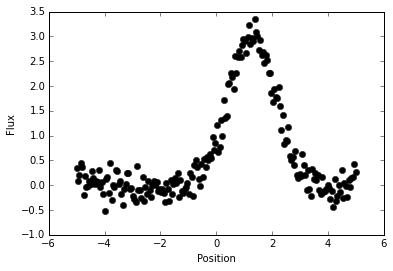

In [30]:
import numpy as np
from astropy.modeling import models, fitting


np.random.seed(0)
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)
plt.plot(x, y, 'ko')
plt.xlabel('Position')
plt.ylabel('Flux')

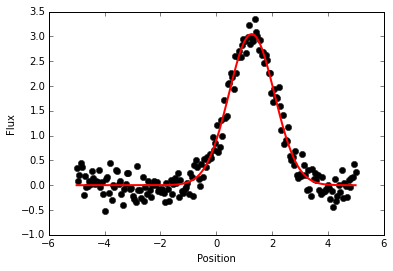

In [31]:
# Fit the data using a Gaussian
model_object = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fiter = fitting.LevMarLSQFitter()
g = fiter(model_object, x, y)

plt.plot(x, y, 'ko')
plt.plot(x, g(x), 'r-', lw=2)
plt.xlabel('Position')
plt.ylabel('Flux')

In [32]:
# Get information about the fitted model:
print(g)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude        mean         stddev    
    ------------- ------------- --------------
    3.04705246874 1.27430145809 0.813535026407


### Cosmology
There is also some work for cosmology computations, specifically with different cosmologies.

For this, it is essential to load a `Cosmology` object. These are, by convention, named `cosmo`:

In [33]:
# Load the 9-year WMAP Cosmology and get H_0
from astropy.cosmology import WMAP9 as cosmo
print(cosmo.H(0))

69.32 km / (Mpc s)


In [34]:
# find the age of the universe at a given redshift:
print(cosmo.age(1))

5.922228776289075 Gyr


In [35]:
# Other cosmologies are avaliable
from astropy.cosmology import Planck13 as cosmo
print(cosmo.age(1))

5.8631661413140685 Gyr


In [36]:
# Build your own cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05)
print(cosmo.age(1))

5.74698053003206 Gyr


## Affliated Packages
I don't believe I'll have time to address these, but it is worth pointing out these useful packages:
- [APLpy](https://aplpy.github.io/): A package for using WCS coordinates in `matplotlib`.
- [specutils](https://github.com/astropy/specutils), [photutils](https://github.com/astropy/photutils), and [ccdproc](https://github.com/astropy/ccdproc): Packages for analyzing 1-D spectrum, photometry, and CCD image reduction. These are likely to be included in Astropy in the future.
- [astroquery](https://github.com/astropy/astroquery): An interface to many public (and restricted) online resources for downloading astronomical data.